# Garima_Sharma_Task_2_Prediction using Unsupervised ML

In [1]:
#import all the necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

In [2]:
from sklearn import datasets
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


# Let's do Some EDA

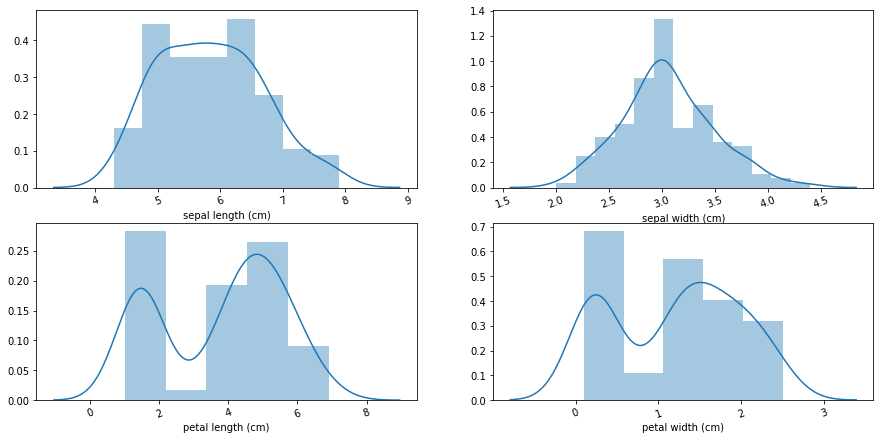

In [4]:
plt.figure(figsize=(15,15))
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
for i in enumerate(features): 
    ax = plt.subplot(4, 2, i[0]+1)
    sns.distplot(iris_df[i[1]])
    plt.xticks(rotation = 20)

In [5]:
# Number of nulls per column
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [6]:
# Let's perfrom Outlier treatment

In [7]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

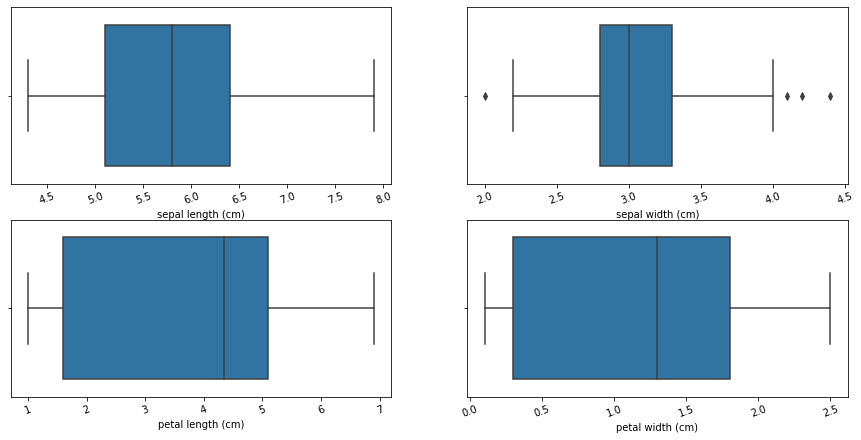

In [8]:
plt.figure(figsize=(15,15))
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
for i in enumerate(features): 
    ax = plt.subplot(4, 2, i[0]+1)
    sns.boxplot(x=i[1], data=iris_df)
    plt.xticks(rotation = 20)

In [9]:
Q1 = iris_df['sepal width (cm)'].quantile(0.01)
Q4 = iris_df['sepal width (cm)'].quantile(0.99)
iris_df['sepal width (cm)'][iris_df['sepal width (cm)'] <= Q1]=Q1
iris_df['sepal width (cm)'][iris_df['sepal width (cm)'] >= Q4]=Q4
iris_df.shape

(150, 4)

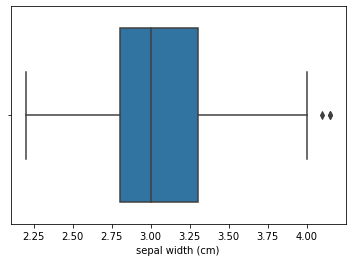

In [10]:
sns.boxplot(x='sepal width (cm)', data=iris_df)

# Clustering

In [11]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

# K- means Clustering


# choose the optimal number of cluster

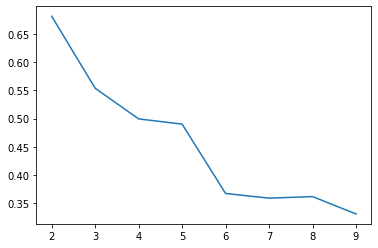

In [12]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(iris_df)
    ss.append([k, silhouette_score(iris_df, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

# Elbow Curve plot and choose the optimal number of cluster

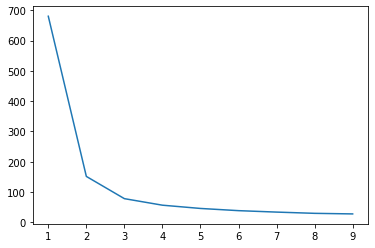

In [13]:
#Now let's proceed to the elbow curve method
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(iris_df)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

In [14]:
#KMeans with the K the we have choosed

In [15]:
#Let's perform K means using K=3
kmean = KMeans(n_clusters = 3, max_iter = 50, random_state = 50)
kmean.fit(iris_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [16]:
# Let's add the cluster Ids to the original data 
df_km = pd.concat([iris_df.reset_index().drop('index', axis = 1), pd.Series(kmean.labels_)], axis = 1)
df_km.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'cluster_id']
df_km.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster_id
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [17]:
# Cross-check
df_km.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
cluster_id           0
dtype: int64

In [18]:
# Check the count of observation per cluster
df_km['cluster_id'].value_counts()

2    62
1    50
0    38
Name: cluster_id, dtype: int64

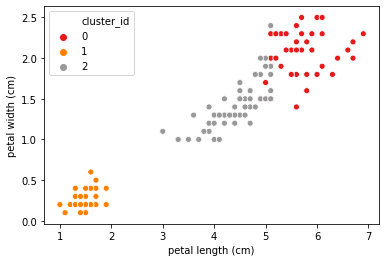

In [19]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')

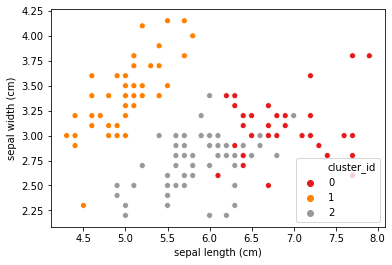

In [20]:
sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')